<a href="https://colab.research.google.com/github/yumnaAlshalak/Nlp-tweets/blob/main/Nlp_tweets_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Book1.csv to Book1 (1).csv


In [ ]:
log=pd.read_csv('Book1.csv')

In [ ]:
log

,API Key,API Key Secret,Bearer Token,Access Token,Access Token Secret
0,M9fc6h9ruS5gzZkKH44AhS1yi,eLkLPzJszysD3VkLwqn6LOyOTwV26bYtltgf48zkqM6Q7m...,AAAAAAAAAAAAAAAAAAAAAGagSwEAAAAAhhKVLTP%2B7QAC...,786886544-hNMKk59Fy9ARwvQka1XkFrnZf5LJ4eSpkcGH...,fE0oKmoZ85b8gzD6I5LdvVv29ycj8ImMrLTbE1qQXZ3pU


# **Authentication for Twitter API**

In [ ]:
apiKey=log['API Key'][0]
apiKeySecret=log['API Key Secret'][0]
bearerToken=log['Bearer Token'][0]
accessToken=log['Access Token'][0]
accessTokenSecret=log['Access Token Secret'][0]

To re-build an OAuthHandler from this stored access token you would do this:

In [ ]:
authenticate=tweepy.OAuthHandler(apiKey,apiKeySecret)
authenticate.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(authenticate,wait_on_rate_limit=True)

# **Fetching the statuses**

In [ ]:
posts=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")

In [ ]:
for tweet in posts:
    print(tweet.full_text+'\n')

If you’re a big tennis fan like I am, @devisridhar’s profile on Althea Gibson is a grand slam. She was the first Black player to win Wimbledon. https://t.co/8wUBjNgsTL

Prime Minister Abe was a friend and partner of our foundation who helped save lives around the world by championing universal health coverage and programs like the Global Fund. I’m shocked and saddened by his death.

Happy 10th birthday to CRISPR, one of the most important inventions in medicine, biology, and agriculture. https://t.co/t0B0ctWPos

.@amortowles is one of my favorite storytellers. I was wowed by his writing in The Lincoln Highway. https://t.co/EyQSRJDMVj

“It’s also a reminder that it’s not just about having enough vaccines or therapeutics. It’s about figuring out how to help countries deploy them.” @ashishkjha https://t.co/7HnwAX7GY6

I got to join the @Breakthrough team to talk about the incredible work they’re doing to accelerate climate innovation. I’m lucky to work with such smart and dedicated indivi

In [ ]:
df=pd.DataFrame([ tweet.full_text for tweet in posts],columns=['Tweets'])
df.head()

,Tweets
0,"If you’re a big tennis fan like I am, @devisri..."
1,Prime Minister Abe was a friend and partner of...
2,"Happy 10th birthday to CRISPR, one of the most..."
3,.@amortowles is one of my favorite storyteller...
4,“It’s also a reminder that it’s not just about...


# **Cleaning**

In [ ]:
def clean_tweet(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'http\S+','',text)
    return text
df['Tweets']=df['Tweets'].apply(clean_tweet)
df

,Tweets
0,"If you’re a big tennis fan like I am, ’s profi..."
1,Prime Minister Abe was a friend and partner of...
2,"Happy 10th birthday to CRISPR, one of the most..."
3,. is one of my favorite storytellers. I was wo...
4,“It’s also a reminder that it’s not just about...
...,...
95,I also had a chance to meet up with Gates Foun...
96,What a day! I had a great time in London chatt...
97,"Thanks, for the thoughtful conversation. I al..."
98,If we’re going to make COVID-19 the last pande...


# **Calculating Polarity and Subjectivity**

Each word in the lexicon has scores for:

1)     polarity: negative vs. positive    (-1.0 => +1.0)


2) subjectivity: objective vs. subjective (+0.0 => +1.0)

In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
# subjectivity: objective vs. subjective (+0.0 => +1.0)
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
#  polarity: negative vs. positive    (-1.0 => +1.0)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,"If you’re a big tennis fan like I am, ’s profi...",0.453333,0.276667
1,Prime Minister Abe was a friend and partner of...,0.266667,-0.233333
2,"Happy 10th birthday to CRISPR, one of the most...",0.833333,0.566667
3,. is one of my favorite storytellers. I was wo...,1.000000,0.500000
4,“It’s also a reminder that it’s not just about...,0.500000,0.000000
...,...,...,...
95,I also had a chance to meet up with Gates Foun...,0.000000,0.000000
96,What a day! I had a great time in London chatt...,0.602273,0.468182
97,"Thanks, for the thoughtful conversation. I al...",0.585714,0.303571
98,If we’re going to make COVID-19 the last pande...,0.066667,0.000000


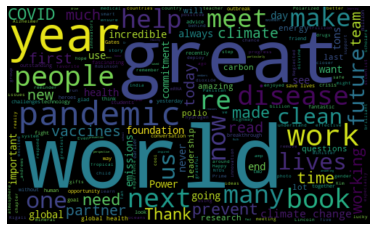

In [ ]:
# repeating words
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
def getAnalysis(score):
    if score < 0:
       return "Negative"
    elif score==0:
       return "Neutral"
    else:
       return "Positive"
df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"If you’re a big tennis fan like I am, ’s profi...",0.453333,0.276667,Positive
1,Prime Minister Abe was a friend and partner of...,0.266667,-0.233333,Negative
2,"Happy 10th birthday to CRISPR, one of the most...",0.833333,0.566667,Positive
3,. is one of my favorite storytellers. I was wo...,1.000000,0.500000,Positive
4,“It’s also a reminder that it’s not just about...,0.500000,0.000000,Neutral
...,...,...,...,...
95,I also had a chance to meet up with Gates Foun...,0.000000,0.000000,Neutral
96,What a day! I had a great time in London chatt...,0.602273,0.468182,Positive
97,"Thanks, for the thoughtful conversation. I al...",0.585714,0.303571,Positive
98,If we’re going to make COVID-19 the last pande...,0.066667,0.000000,Neutral


In [ ]:
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(sortedDF['Tweets'][i])
    print()

If you’re a big tennis fan like I am, ’s profile on Althea Gibson is a grand slam. She was the first Black player to win Wimbledon. 

Happy 10th birthday to CRISPR, one of the most important inventions in medicine, biology, and agriculture. 

. is one of my favorite storytellers. I was wowed by his writing in The Lincoln Highway. 

I got to join the  team to talk about the incredible work they’re doing to accelerate climate innovation. I’m lucky to work with such smart and dedicated individuals. 

Today’s ruling makes it more challenging for the US to hit its climate goals. It’s now more important than ever for Congress to level the playing field for clean technologies.

Being in New York is always fun – you never know who you’ll run into. It was great meeting you and Namrata! 

Here’s progress worth celebrating. More people have bank accounts than ever before:  

It’s great to see countries and partners jointly sign the Kigali Declaration. It wouldn't have been possible without Kigali

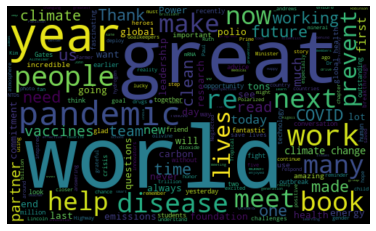

In [ ]:
allWords1=' '.join([twts for twts in sortedDF['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords1)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
sortedDFN=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDFN.shape[0]):
  if(sortedDFN['Analysis'][i]=='Negative'):
    print(sortedDFN['Tweets'][i])
    print()

Prime Minister Abe was a friend and partner of our foundation who helped save lives around the world by championing universal health coverage and programs like the Global Fund. I’m shocked and saddened by his death.

Yesterday, I had a chance to spend the day focusing on climate – and the innovations that can prevent the very worst effects of climate change. 



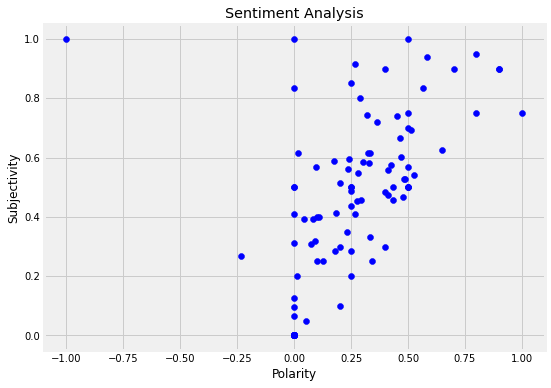

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)

74.0

In [ ]:
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100,1)

2.0

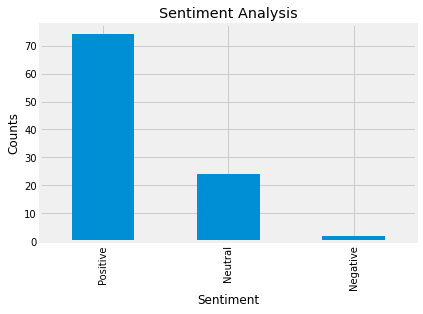

In [ ]:
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind="bar")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["Tweets"],df["Analysis"],test_size=0.2,shuffle=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)

LogisticRegression(C=10, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
print(accuracy_score(y_test,y_predict))

0.7


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
print(accuracy_score(y_test,y_predict))

0.7


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_vectors_tfidf, y_train)

SGDClassifier()

In [ ]:
y_predict = sgd_clf.predict(X_test_vectors_tfidf)
print(accuracy_score(y_test,y_predict))

0.65


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_vectors_tfidf, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = tree_clf.predict(X_test_vectors_tfidf)
print(accuracy_score(y_test,y_predict))

0.4
